This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.6327 - accuracy: 0.8094 - val_loss: 0.2732 - val_accuracy: 0.9226
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.2433 - accuracy: 0.9246 - val_loss: 0.1912 - val_accuracy: 0.9409
Epoch 3/10
375/375 [==============================] - 14s 37ms/step - loss: 0.1596 - accuracy: 0.9492 - val_loss: 0.1963 - val_accuracy: 0.9408
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1140 - accuracy: 0.9640 - val_loss: 0.1314 - val_accuracy: 0.9620
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0842 - accuracy: 0.9735 - val_loss: 0.1389 - val_accuracy: 0.9604
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 0.1280 - val_accuracy: 0.9651
Epoch 7/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.1466 - val_accuracy: 0.95

**Plotting a validation accuracy comparison**

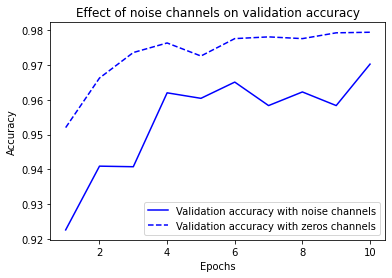

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 15ms/step - loss: 2.3170 - accuracy: 0.1029 - val_loss: 2.3074 - val_accuracy: 0.1005
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.3000 - accuracy: 0.1156 - val_loss: 2.3157 - val_accuracy: 0.1059
Epoch 3/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2911 - accuracy: 0.1261 - val_loss: 2.3204 - val_accuracy: 0.0982
Epoch 4/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2785 - accuracy: 0.1381 - val_loss: 2.3274 - val_accuracy: 0.1032
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2618 - accuracy: 0.1532 - val_loss: 2.3386 - val_accuracy: 0.0980
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2415 - accuracy: 0.1670 - val_loss: 2.3594 - val_accuracy: 0.0941
Epoch 7/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2177 - accuracy: 0.1813 - val_loss: 2.3705 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 665.4363 - accuracy: 0.3265 - val_loss: 2.2609 - val_accuracy: 0.2140
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 4.4430 - accuracy: 0.2568 - val_loss: 2.1823 - val_accuracy: 0.2335
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 3.3409 - accuracy: 0.2362 - val_loss: 2.4402 - val_accuracy: 0.2758
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 2.7180 - accuracy: 0.2493 - val_loss: 2.2928 - val_accuracy: 0.2607
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 2.8682 - accuracy: 0.2756 - val_loss: 2.6287 - val_accuracy: 0.2293
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8329 - accuracy: 0.2697 - val_loss: 3.1695 - val_accuracy: 0.3047
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.6308 - accuracy: 0.2645 - val_loss: 3.9763 - val_accuracy: 0.26

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3553 - accuracy: 0.9129 - val_loss: 0.1904 - val_accuracy: 0.9489
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1420 - accuracy: 0.9646 - val_loss: 0.1436 - val_accuracy: 0.9654
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1162 - accuracy: 0.9730 - val_loss: 0.1445 - val_accuracy: 0.9709
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0952 - accuracy: 0.9795 - val_loss: 0.1891 - val_accuracy: 0.9709
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0954 - accuracy: 0.9812 - val_loss: 0.2222 - val_accuracy: 0.9684
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0785 - accuracy: 0.9840 - val_loss: 0.3138 - val_accuracy: 0.9674
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0755 - accuracy: 0.9862 - val_loss: 0.3005 - val_accuracy: 0.9679

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6613 - accuracy: 0.8370 - val_loss: 0.3554 - val_accuracy: 0.9034
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.9033 - val_loss: 0.3085 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.9123 - val_loss: 0.2903 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9160 - val_loss: 0.2798 - val_accuracy: 0.9231
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.9194 - val_loss: 0.2768 - val_accuracy: 0.9235
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.9209 - val_loss: 0.2697 - val_accuracy: 0.9266
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.9224 - val_loss: 0.2690 - val_accuracy: 0.9258
Epoch 

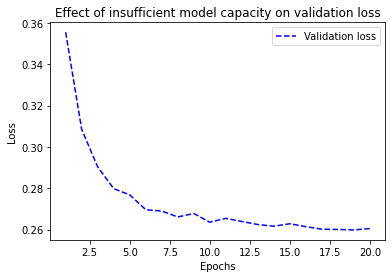

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3633 - accuracy: 0.8972 - val_loss: 0.2082 - val_accuracy: 0.9404
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1615 - accuracy: 0.9516 - val_loss: 0.1360 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1129 - accuracy: 0.9663 - val_loss: 0.1116 - val_accuracy: 0.9673
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0876 - accuracy: 0.9725 - val_loss: 0.1022 - val_accuracy: 0.9691
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0694 - accuracy: 0.9788 - val_loss: 0.1010 - val_accuracy: 0.9727
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.0923 - val_accuracy: 0.9734
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0936 - val_accuracy: 0.9737
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5114 - accuracy: 0.7917 - val_loss: 0.3873 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3083 - accuracy: 0.9020 - val_loss: 0.3421 - val_accuracy: 0.8592
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2280 - accuracy: 0.9279 - val_loss: 0.2800 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1803 - accuracy: 0.9421 - val_loss: 0.2878 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1484 - accuracy: 0.9522 - val_loss: 0.2812 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1234 - accuracy: 0.9612 - val_loss: 0.3021 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0992 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.6122 - accuracy: 0.7548 - val_loss: 0.5335 - val_accuracy: 0.8297
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4671 - accuracy: 0.8775 - val_loss: 0.4406 - val_accuracy: 0.8489
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3735 - accuracy: 0.8981 - val_loss: 0.3690 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3071 - accuracy: 0.9114 - val_loss: 0.3272 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2602 - accuracy: 0.9219 - val_loss: 0.3031 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2248 - accuracy: 0.9329 - val_loss: 0.2860 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1969 - accuracy: 0.9404 - val_loss: 0.2768 - val_accuracy: 0.8909
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 11s 329ms/step - loss: 0.5281 - accuracy: 0.7579 - val_loss: 0.3779 - val_accuracy: 0.8457
Epoch 2/20
30/30 [==============================] - 9s 318ms/step - loss: 0.2500 - accuracy: 0.9017 - val_loss: 0.2882 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 9s 316ms/step - loss: 0.1386 - accuracy: 0.9487 - val_loss: 0.3409 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 9s 319ms/step - loss: 0.0687 - accuracy: 0.9762 - val_loss: 0.4110 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 9s 313ms/step - loss: 0.1107 - accuracy: 0.9771 - val_loss: 0.3879 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 9s 305ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.5579 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 9s 314ms/step - loss: 6.0101e-04 - accuracy: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.8863
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5983 - accuracy: 0.7747 - val_loss: 0.4730 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4080 - accuracy: 0.8926 - val_loss: 0.4055 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3397 - accuracy: 0.9143 - val_loss: 0.3913 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3092 - accuracy: 0.9237 - val_loss: 0.3673 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2853 - accuracy: 0.9315 - val_loss: 0.4246 - val_accuracy: 0.8531
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2755 - accuracy: 0.9346 - val_loss: 0.3571 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2600 - accuracy: 0.9408 - val_loss: 0.3794 - val_accuracy: 0.8760
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.6326 - accuracy: 0.6351 - val_loss: 0.5078 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5060 - accuracy: 0.7749 - val_loss: 0.4043 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4197 - accuracy: 0.8291 - val_loss: 0.3408 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3531 - accuracy: 0.8655 - val_loss: 0.2928 - val_accuracy: 0.8920
Epoch 5/20
30/30 [==============================] - 2s 50ms/step - loss: 0.3078 - accuracy: 0.8866 - val_loss: 0.2768 - val_accuracy: 0.8932
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2686 - accuracy: 0.9054 - val_loss: 0.2720 - val_accuracy: 0.8930
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2423 - accuracy: 0.9185 - val_loss: 0.2745 - val_accuracy: 0.8941
Epoch 8/20
30

## Summary